In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
from sklearn.cross_validation import train_test_split

In [67]:
content_data = []
data = []

In [68]:
for i in os.listdir("/home/sp/Documents/Assign4/crop_part1"):
    content= i.split("_")
    if((content[0].isnumeric()) and (content[1].isnumeric()) and (content[2].isnumeric())):
        content_data.append([content[0],content[1],content[2],os.path.join("/home/sp/Documents/Assign4/crop_part1/",i)])

In [69]:
data = pd.DataFrame(content_data,columns=["Age","Gender","Race","Filename"])

In [70]:
data.head(10)

,Age,Gender,Race,Filename
0,27,1,2,/home/sp/Documents/Assign4/crop_part1/27_1_2_2...
1,4,1,3,/home/sp/Documents/Assign4/crop_part1/4_1_3_20...
2,1,0,2,/home/sp/Documents/Assign4/crop_part1/1_0_2_20...
3,85,1,0,/home/sp/Documents/Assign4/crop_part1/85_1_0_2...
4,17,1,3,/home/sp/Documents/Assign4/crop_part1/17_1_3_2...
5,26,1,4,/home/sp/Documents/Assign4/crop_part1/26_1_4_2...
6,66,0,0,/home/sp/Documents/Assign4/crop_part1/66_0_0_2...
7,13,0,1,/home/sp/Documents/Assign4/crop_part1/13_0_1_2...
8,25,1,2,/home/sp/Documents/Assign4/crop_part1/25_1_2_2...
9,38,0,3,/home/sp/Documents/Assign4/crop_part1/38_0_3_2...


In [71]:
data["Race"] = data["Race"].replace({"0":"White","1":"Black","2":"Asian","3":"Indian","4":"Others"})

In [72]:
data.head(10)

,Age,Gender,Race,Filename
0,27,1,Asian,/home/sp/Documents/Assign4/crop_part1/27_1_2_2...
1,4,1,Indian,/home/sp/Documents/Assign4/crop_part1/4_1_3_20...
2,1,0,Asian,/home/sp/Documents/Assign4/crop_part1/1_0_2_20...
3,85,1,White,/home/sp/Documents/Assign4/crop_part1/85_1_0_2...
4,17,1,Indian,/home/sp/Documents/Assign4/crop_part1/17_1_3_2...
5,26,1,Others,/home/sp/Documents/Assign4/crop_part1/26_1_4_2...
6,66,0,White,/home/sp/Documents/Assign4/crop_part1/66_0_0_2...
7,13,0,Black,/home/sp/Documents/Assign4/crop_part1/13_0_1_2...
8,25,1,Asian,/home/sp/Documents/Assign4/crop_part1/25_1_2_2...
9,38,0,Indian,/home/sp/Documents/Assign4/crop_part1/38_0_3_2...


In [73]:
training = []
train = []
test = []
val = []

In [74]:
training, test = train_test_split(data,test_size=0.1)

In [75]:
train, val = train_test_split(training,test_size=0.1)

In [76]:
print(train.shape)
print(val.shape)
print(test.shape)

(7920, 4)
(880, 4)
(978, 4)


In [77]:
train.head(10)

,Age,Gender,Race,Filename
6610,51,0,Indian,/home/sp/Documents/Assign4/crop_part1/51_0_3_2...
2653,59,0,White,/home/sp/Documents/Assign4/crop_part1/59_0_0_2...
5086,26,1,Indian,/home/sp/Documents/Assign4/crop_part1/26_1_3_2...
528,17,1,Others,/home/sp/Documents/Assign4/crop_part1/17_1_4_2...
4832,4,0,Asian,/home/sp/Documents/Assign4/crop_part1/4_0_2_20...
5293,12,1,White,/home/sp/Documents/Assign4/crop_part1/12_1_0_2...
8811,29,1,Black,/home/sp/Documents/Assign4/crop_part1/29_1_1_2...
214,54,1,White,/home/sp/Documents/Assign4/crop_part1/54_1_0_2...
4545,41,0,Others,/home/sp/Documents/Assign4/crop_part1/41_0_4_2...
7830,46,1,White,/home/sp/Documents/Assign4/crop_part1/46_1_0_2...


In [78]:
test.head(10)

,Age,Gender,Race,Filename
6786,33,1,White,/home/sp/Documents/Assign4/crop_part1/33_1_0_2...
3572,80,0,White,/home/sp/Documents/Assign4/crop_part1/80_0_0_2...
3431,7,0,White,/home/sp/Documents/Assign4/crop_part1/7_0_0_20...
1437,2,1,Others,/home/sp/Documents/Assign4/crop_part1/2_1_4_20...
5612,1,1,Asian,/home/sp/Documents/Assign4/crop_part1/1_1_2_20...
429,10,1,White,/home/sp/Documents/Assign4/crop_part1/10_1_0_2...
2144,4,1,White,/home/sp/Documents/Assign4/crop_part1/4_1_0_20...
8084,58,0,White,/home/sp/Documents/Assign4/crop_part1/58_0_0_2...
1131,16,0,White,/home/sp/Documents/Assign4/crop_part1/16_0_0_2...
7915,1,0,White,/home/sp/Documents/Assign4/crop_part1/1_0_0_20...


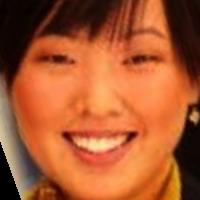

In [79]:
tf.keras.preprocessing.image.load_img(train["Filename"][0])

In [80]:
imgdatagen = ImageDataGenerator()

In [115]:
train_data = []
val_data = []
model = []

In [116]:
train_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filename",y_col="Race",class_mode="categorical",classes=["White","Black","Asian","Indian","Others"],target_size=(200,200))

Found 7920 validated image filenames belonging to 5 classes.


In [117]:
val_data = imgdatagen.flow_from_dataframe(dataframe=val,x_col="Filename",y_col="Race",class_mode="categorical",classes=["White","Black","Asian","Indian","Others"],target_size=(200,200))

Found 880 validated image filenames belonging to 5 classes.


In [118]:
model = Sequential()

In [119]:
model.add(Conv2D(128,(3,3),input_shape=(200,200,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(5,activation='sigmoid'))

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 128)     3584      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 196, 196, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1474565   
Total para

In [121]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [124]:
model.fit(train_data,validation_data=val_data,epochs=100,batch_size=1)

Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[32,128,196,196] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2d_13/Conv2D}} = Conv2D[T=DT_FLOAT, _class=["loc:@training_4/Adam/gradients/conv2d_13/Conv2D_grad/Conv2DBackpropInput"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_12/Relu, conv2d_13/Conv2D/ReadVariableOp)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_4/dense_4_loss/broadcast_weights/assert_broadcastable/AssertGuard/Assert/Switch_1/_405}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_302_l...t/Switch_1", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
